In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import math
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing
# cross_validation is deprecated, use "model_selection"
# import sklearn.model_selection

Exploring the Data

In [2]:
df = pd.read_csv(r'C:\Users\d3583\OneDrive\Documents\PESU\Data-Analytics-Project\KaggleCompetition\train.csv')
# print(df.describe())
print(df.tail(5))
#  High & Low tell us about the volatility 

            Date        Open        High         Low     Volume       Close
1495  23-07-2021  299.658540  301.995035  298.400415   71447400  301.675507
1496  26-07-2021  301.096392  304.211720  299.958083   72434100  302.534241
1497  27-07-2021  302.793811  302.973565  295.664509  104818600  298.100861
1498  28-07-2021  294.186727  298.500271  289.653510  118931200  294.526215
1499  29-07-2021  293.947087  297.661523  293.727415   56699500  295.844238


In [3]:
# finding duplicates
dup_df = df[df.duplicated()]
print("no of duplicate rows", dup_df.shape)
print(dup_df)
# find null values
print(df.isnull().sum())
# shape etc
print(df.dtypes)
print(df.shape)


df.dropna(inplace=True)

no of duplicate rows (0, 6)
Empty DataFrame
Columns: [Date, Open, High, Low, Volume, Close]
Index: []
Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64
Date       object
Open      float64
High      float64
Low       float64
Volume      int64
Close     float64
dtype: object
(1500, 6)


In [4]:
df['HLDiff'] = (df['High'] - df['Low'])

In [5]:
df = df[['Date','Open','HLDiff','Volume', 'Close']]
print(df)

            Date        Open    HLDiff     Volume       Close
0     14-08-2015   57.484790  1.055938  171718000   58.237720
1     17-08-2015   58.274453  0.987075  163538800   58.788651
2     18-08-2015   58.453501  0.656519  138242800   58.485638
3     19-08-2015   58.301997  0.844750  193146000   57.801575
4     20-08-2015   57.374601  1.248764  274006400   56.718082
...          ...         ...       ...        ...         ...
1495  23-07-2021  299.658540  3.594621   71447400  301.675507
1496  26-07-2021  301.096392  4.253637   72434100  302.534241
1497  27-07-2021  302.793811  7.309056  104818600  298.100861
1498  28-07-2021  294.186727  8.846761  118931200  294.526215
1499  29-07-2021  293.947087  3.934108   56699500  295.844238

[1500 rows x 5 columns]


In [11]:
df['DaysSince'] = np.arange(df['Date'].size)
x = np.arange(df['Date'].size)
print(df)
Xdf = df[['Open', 'Volume', 'DaysSince', 'HLDiff']]
fit = np.polyfit(x, df['Close'], deg=1)
print('y = ',fit[0],'x+',fit[1])

            Date        Open    HLDiff     Volume       Close  DaysSince
0     14-08-2015   57.484790  1.055938  171718000   58.237720          0
1     17-08-2015   58.274453  0.987075  163538800   58.788651          1
2     18-08-2015   58.453501  0.656519  138242800   58.485638          2
3     19-08-2015   58.301997  0.844750  193146000   57.801575          3
4     20-08-2015   57.374601  1.248764  274006400   56.718082          4
...          ...         ...       ...        ...         ...        ...
1495  23-07-2021  299.658540  3.594621   71447400  301.675507       1495
1496  26-07-2021  301.096392  4.253637   72434100  302.534241       1496
1497  27-07-2021  302.793811  7.309056  104818600  298.100861       1497
1498  28-07-2021  294.186727  8.846761  118931200  294.526215       1498
1499  29-07-2021  293.947087  3.934108   56699500  295.844238       1499

[1500 rows x 6 columns]
y =  0.1426517855065736 x+ 11.11673165602973


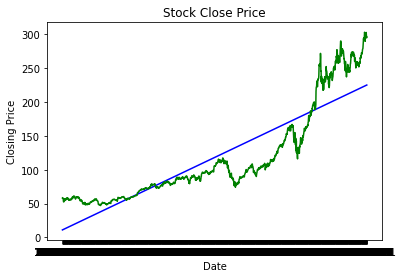

In [7]:
fit_function = np.poly1d(fit)

#Time series data plot
# plot the prediction
plt.plot(df['Date'], fit_function(x), 'b')
# plot the actual train values
plt.plot(df['Date'], df['Close'], 'g')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Close Price')

plt.show()

In [8]:
print(df['Date'].size)

1500


In [ ]:
#  fit_function(df['Date'].size + 14)
prediction = fit_function(x)
for ele in prediction:
    print(ele)

In [19]:
df['DaysSince'] = np.arange(df['Date'].size)
Xdf = df[['Open', 'Volume', 'DaysSince', 'HLDiff']]
print(Xdf)
X = Xdf.to_numpy()
print(X)
y = df['Close'].to_numpy()
print(len(X), len(y))
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)
print(x_train)

            Open     Volume  DaysSince    HLDiff
0      57.484790  171718000          0  1.055938
1      58.274453  163538800          1  0.987075
2      58.453501  138242800          2  0.656519
3      58.301997  193146000          3  0.844750
4      57.374601  274006400          4  1.248764
...          ...        ...        ...       ...
1495  299.658540   71447400       1495  3.594621
1496  301.096392   72434100       1496  4.253637
1497  302.793811  104818600       1497  7.309056
1498  294.186727  118931200       1498  8.846761
1499  293.947087   56699500       1499  3.934108

[1500 rows x 4 columns]
[[5.74847899e+01 1.71718000e+08 0.00000000e+00 1.05593751e+00]
 [5.82744525e+01 1.63538800e+08 1.00000000e+00 9.87074740e-01]
 [5.84535005e+01 1.38242800e+08 2.00000000e+00 6.56519130e-01]
 ...
 [3.02793811e+02 1.04818600e+08 1.49700000e+03 7.30905630e+00]
 [2.94186727e+02 1.18931200e+08 1.49800000e+03 8.84676140e+00]
 [2.93947087e+02 5.66995000e+07 1.49900000e+03 3.93410810e+00]]
150

In [20]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [21]:
y_prediction =  LR.predict(x_test)
print(y_prediction)

[162.56401785 270.68069512  72.20452668  73.33116526  78.25059676
  79.72880277 131.97953418  98.38010151 276.75698836  55.90275618
  90.11923123 268.45219129  98.06506465 277.08741753  59.81049727
 257.45535418 292.19875994  88.79334957  74.43467689  57.89558233
 162.47107778 164.69304372 155.38677227 208.71602989 257.47320816
  73.9720552  260.29189019 264.24441598 194.39625116 233.76209209
 135.50098222  89.43586664 211.95416823 112.69624288  48.84763123
  60.01200473  71.90146703  73.19716016 150.12887968  58.94560455
 253.99922656  78.61508054 251.09605951  81.28660723 136.39683361
  61.03373235  62.42362524  57.30331749  97.78536206 106.03578723
  85.30010686  79.51814241 146.76343533 233.02706802  79.97785611
  84.11932839  58.44196559  78.00164505  55.75644925  96.14727299
  88.70467092  84.61596841  77.09253785  58.25404049 111.3019723
  76.31479452  56.15180448 144.70173514 191.21723971  48.34716362
  58.32515263  75.44874733 115.41197531  58.33519394  98.41578452
 238.063428

In [23]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.9989440615788491
mean_sqrd_error is== 5.096983062984333
root_mean_squared error of is== 2.2576498982314184
